**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Fall 2020</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: Jan 03, 2021 23:59 (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks. You should implement programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries inclueded in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions, please contact "ilaydabeyreli@gmail.com" or "ilayda.beyreli@bilkent.edu.tr".
    </li>

</ul>

## Environment Setup

This homewrok is prepeared by using Google CoLab which already has required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "pacakge_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


##Question 1 [12 pts.]

Answer the given questions with **at most a sentence**.

  >a) What is one reason not to use the same data for both your training set and your testing set?<br>
  >Ans a) In order to avoid overfitting the data points on the testing set.
<br> <br>
  >b) Why is it important for machine learning algorithms to have access to high-quality(large and accurate enough) data ?<br>
  >Ans b) Machine learning algorithms have their performance upper-bounded by the data quality where poor data can bias the model towards undesirable outcomes and not capture distribution reperesented by the real world.
  <br> <br>
  >c) What is the main motivation for using activation functions in artificial neural networks (ANNs)?<br>
  >Ans c) In order to learn complex data patterns by adding non-linearity, and restricting the output of an ANN neuron within certain bounds.
<br> <br>
  >d) The activations for class A, B and C before softmax were 12, 7 and 4. What would be the softmax values for class A and class B?<br>
  >Ans d) Using, $Softmax(z_{i}) = \frac{e^i}{\sum_{j=1}^n e^j}$
<br>
For A, Softmax = 0.99
<br>
For B, Softmax = 0.0067
<br> <br>
  >e) What does it mean to underfit your data model?<br>
  >Ans e) It means that the model performs poorly on the training data.
<br> <br>
  >f) Consider you have a 14 class classification problem. What would be the probability of random guess?<br>
  >Ans f) Probability of random guess = 1/14 = 0.071



##Question 2 [88 pts.]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify cats according to their breeds by using simple machine learning algorithms developed for CV problems on cat images.

Your dataset consist of XXX cat images from 15 breeds. Images of each breed is stored under separate folders in the compressed file given to you.  The dataset has been processed in such a way that each class has approximately 1900 samples.

Download the dataset from the following link:
<br>
https://drive.google.com/.....
<br>

Libraries that are required in this question is given in the following code cell.

### Unzip Data

In [ ]:
# !unzip data.zip

### Libraries

In [ ]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# PyTorch
import os
import time
import glob
import torch
import torch.nn as nn
import torch.nn.functional as F
# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.

### Data Loader [8 pts.]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "CatsDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, 
<b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of CatsDataset, should be retrieved using the "get_dataset" function. Since this data loader will be called to get the input for different models, your function should work in a least two modes:
1. To be compatible with MLP, you need to resize the image to 64x64x3 to have consistent input size for all images. Then, you should convert your image to grayscale and flatten it into a vector. Note that the pixel values also needs to be normalized to [0,1] range.
<br>
2. To be compatible with CNN, you need to resize the image to 64x64x3 to have consistent input size for all images. Note that, you **should not** flatten the image or convert it to grayscale in this mode, i.e. all channels of the images should be included and each image should be stored as a matrix.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [ ]:
class CatsDataset(Dataset):
    # Define constructor for CatsDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, data, labels):
      self.data = data 
      self.labels = labels
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
      return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
      _x = self.data[index]
      _y = self.labels[index]
      
      return _x, _y

In [ ]:
def get_dataset(root, mode='MLP'):
  # Read dataset files
  file_nums = [len(os.listdir(f'{root}/{os.listdir(root)[x]}')) for x in range(len(os.listdir(root)))]
  data = []

  if mode == 'MLP':
    data = np.zeros((sum(file_nums), 4096))
    labels = []

    for class_id in range(len(os.listdir(root))):
      for fl in glob.iglob(f'{root}/{os.listdir(root)[class_id]}/*.jpg'):
        img = np.array(Image.open(fl).resize((64,64)).convert('L')).flatten()
        labels.append(class_id)
        data[len(labels)-1] = img
  
    labels = np.array(labels)

    # Normalize datasets
    data = (data-data.min())/(data.max()-data.min())
    data = np.c_[data, labels]
    np.random.shuffle(data)
    labels = data[:,-1]
    data = data[:, :-1]
  else:
    imgs = []
    labels = []
   
    X = np.zeros((sum(file_nums), 3, 64, 64))
    for class_id in range(len(os.listdir(root))):
      for fl in glob.iglob(f'{root}/{os.listdir(root)[class_id]}/*.jpg'):
        img = np.array(Image.open(fl).resize((64,64)))
        labels.append(class_id)
        X[len(labels)-1] = np.stack((img[:,:,0], img[:,:,1], img[:,:,2]), axis=0)

    labels = np.array(labels)

    # Normalize datasets
    X = (X-X.min())/(X.max()-X.min())
    
    data = []
    for i in range(len(labels)):
      data.append([X[i], labels[i]])

    data = np.array(data)
    np.random.shuffle(data)
    labels = [d[1] for d in data]
    labels = np.array(labels)
    data = [np.asarray(d[0]) for d in data]
    data = np.array(data)

  num_train = int(0.7*len(data))
  num_validate = int(0.2*len(data))
  train_dataset = CatsDataset(data[:num_train], labels[:num_train])
  val_dataset = CatsDataset(data[num_train:num_train+num_validate], labels[num_train:num_train+num_validate])
  test_dataset = CatsDataset(data[num_train+num_validate:], labels[num_train+num_validate:])

  return train_dataset, val_dataset, test_dataset

###Model Implementations [10 pts.]

#### Multi Layer Perceptron [5 pts.]
Now, implement your three layer neural network. (Input+hidden1+hidden2) FNet class will represent your neural network. The first hidden layer will contain 2048 neurons, and the second will have 1024 neurons. You will decide the number of input and output neurons. Use ReLU as your hidden layer activation function. You need to pick a proper activation function for the output layer.

In [ ]:
class FNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): 
      # You should create your neural network here
      super(FNet, self).__init__()
      self.network = nn.Sequential(
          # each image appears to be 64x64
          nn.Linear(4096, 2048), # input layer
          nn.ReLU(),
          nn.Linear(2048, 1024), # hidden layer 1
          nn.ReLU(),
          nn.Linear(1024,256), # hidden layer 2
          nn.ReLU(),
          nn.Linear(256, 15) # output layer
          # the Cross Entropy loss function defined in the next few cells contains the LogSoftmax activation layer
      )
    
    def forward(self, X): 
      # Forward propagation implementation should be here
      return self.network(X)

#### Convolutional Neural Network [5 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 4 layers of convolution: 
<ul>
    <li>(1) 8 filters with size of 3 x 3 with stride 1 and no padding, (2) ReLU </li>
    <li>(3) 16 filters with size of 3 x 3 with stride 1 and no padding, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 32 filters with size of 5 x 5 with stride 1 and padding 1, (7) ReLU and (8) MaxPool 2 x 2 </li> 
    <li>(9) 32 filters with size of 5 x 5 with stride 1 and padding 1, (10) ReLU and (11) MaxPool 2 x 2 </li> 
</ul>

As the classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [ ]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): 
      # You should create your neural network here
      super(ConvNet, self).__init__()
      self.network = nn.Sequential(
          nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3,stride=1, padding=0), # 64x64x3 --> 62x62x8
          nn.ReLU(),
          nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3,stride=1, padding=0), # 62x62x8 --> 60x60x16
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2),                                                  # 60x60x16 --> 30x30x16
          nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5,stride=1, padding=1), # 30x30x16 --> 28x28x32
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2),                                                    # 30x30x32 --> 15x15x32
          nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5,stride=1, padding=1), # 15x15x32 --> 13x13x32
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2),                                                   # 13x13x32 --> 6x6x32
          nn.Flatten(),
          nn.Linear(1152,15)
          # the Cross Entropy loss function defined in the next few cells contains the LogSoftmax activation layer
      )
     
    def forward(self, X):
      # Forward propagation implementation should be here
      return self.network(X)

###Stochastic Gradient Descent [35 pts.]

####Training with SGD [20 pts.]

Train both models up to 700 epochs with properly processed inputs, i.e. call your "get_dataset" function in mode "1" for MLP and mode "2" for CNN. Use SGD as your optimizer. Tune your learning rate, weight decay. Take momentum as $0$ Save your best models, i.e. MLP and CNN models with highest performance, as "best_mlp_sgd.pth" and "best_cnn_sgd.pth". The best model decision is up to you. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures for each model:
1. training loss and validation loss vs. epoch
2. validation acuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

Streaming output truncated to the last 5000 lines.
Epoch: 423/700    Batch: 5/17    Time: 0.429 Loss: 2.4020   Accuracy: 0.1650
Epoch: 423/700    Batch: 6/17    Time: 0.466 Loss: 2.4048   Accuracy: 0.1670
Epoch: 423/700    Batch: 7/17    Time: 0.502 Loss: 2.3926   Accuracy: 0.1816
Epoch: 423/700    Batch: 8/17    Time: 0.538 Loss: 2.3560   Accuracy: 0.1924
Epoch: 423/700    Batch: 9/17    Time: 0.573 Loss: 2.4258   Accuracy: 0.1807
Epoch: 423/700    Batch: 10/17    Time: 0.610 Loss: 2.4229   Accuracy: 0.1621
Epoch: 423/700    Batch: 11/17    Time: 0.645 Loss: 2.4065   Accuracy: 0.1660
Epoch: 423/700    Batch: 12/17    Time: 0.685 Loss: 2.3989   Accuracy: 0.1865
Epoch: 423/700    Batch: 13/17    Time: 0.720 Loss: 2.3577   Accuracy: 0.1943
Epoch: 423/700    Batch: 14/17    Time: 0.755 Loss: 2.3834   Accuracy: 0.1904
Epoch: 423/700    Batch: 15/17    Time: 0.792 Loss: 2.3855   Accuracy: 0.1650
Epoch: 423/700    Batch: 16/17    Time: 0.827 Loss: 2.4239   Accuracy: 0.1729
Epoch: 423/700    

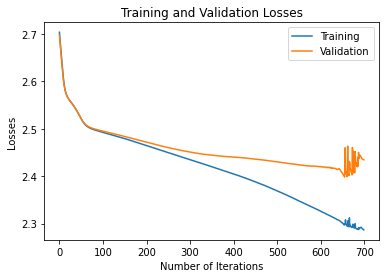

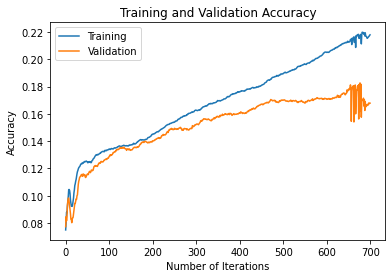

In [ ]:
# HINT: note that your training time should not take many days.
# MLP

mlp_sgd_train_set, mlp_sgd_val_set, mlp_sgd_test_set = get_dataset('./data', mode='MLP')

# Pick your hyper parameters
max_epoch = 700
train_batch = 1024
val_batch = 256
test_batch = 256
learning_rate = 0.01

use_gpu = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Create train dataset loader
mlp_sgd_train_dl = DataLoader(mlp_sgd_train_set, batch_size=train_batch)
# Create validation dataset loader
mlp_sgd_val_dl = DataLoader(mlp_sgd_val_set, batch_size=train_batch)
# Create test dataset loader
mlp_sgd_test_dl = DataLoader(mlp_sgd_test_set, batch_size=train_batch)

# initialize your network
model = FNet() 
model.to(use_gpu)

# define your loss function
loss = nn.CrossEntropyLoss().to(use_gpu)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0, weight_decay=5e-04) # you can play with  weight_decay as well

# structures to store losses, accuracies, and best path
train_acc = []
train_losses = []
val_acc = []
val_losses = []
best_loss = 1000
best_mlp_path = 'best_mlp_sgd.pth'

# start training
# for each epoch calculate validation performance
start = time.time()
for epoch in range(max_epoch):
  model = model.train()
  loc_losses = []
  loc_acc = []
  # iterate over training batches
  for idx, (data, labels) in enumerate(mlp_sgd_train_dl):
    # transfer data and labels to gpu
    data = data.to(use_gpu)
    labels = labels.to(use_gpu)

    # move forward in the network
    optimizer.zero_grad()
    pred_labels = model.forward(data.float()).squeeze()
    cur_loss = loss(pred_labels.to(use_gpu), labels.type(torch.LongTensor).to(use_gpu))
    acc = float((torch.max(pred_labels,1)[1]==labels).sum())/labels.shape[0]

    # backpropogate
    cur_loss.backward()
    optimizer.step()

    loc_acc.append(acc)
    loc_losses.append(cur_loss.item())

    print(f'Epoch: {epoch+1}/{max_epoch}    Batch: {idx+1}/{len(mlp_sgd_train_dl)}    Time: {time.time()-start:.3f} Loss: {cur_loss.item():.4f}   Accuracy: {acc:.4f}')

  train_acc.append(sum(loc_acc)/len(loc_acc))
  train_losses.append(sum(loc_losses)/len(loc_losses))
  


  # validation
  start = time.time()
  model = model.eval()
  with torch.no_grad():
    loc_losses = []
    loc_acc = []
    # iterate over validation batches
    for idx, (data, labels) in enumerate(mlp_sgd_val_dl):
      # transfer data and labels to gpu
        data = data.to(use_gpu)
        labels = labels.to(use_gpu)

        out = model.forward(data.float()).squeeze()
        cur_loss = loss(out.to(use_gpu), labels.type(torch.LongTensor).to(use_gpu))
        acc = float((torch.max(out,1)[1]==labels).sum())/labels.shape[0]

        loc_acc.append(acc)
        loc_losses.append(cur_loss.item())
      
    val_acc.append(sum(loc_acc)/len(loc_acc))
    val_losses.append(sum(loc_losses)/len(loc_losses))

    if val_losses[-1] < best_loss:
      # save best model according to validation performance
      torch.save(model, best_mlp_path)
      best_loss = val_losses[-1]

      
    print(f'>>> Validation -- Time: {time.time()-start:.3f}   Avg. Loss: {sum(val_losses)/len(val_losses):.4f}    Avg. Accuracy: {sum(val_acc)/len(val_acc):.4f}')
      

# plot losses vs epoch 
plt.plot(range(len(train_losses)), train_losses, label='Training')
plt.plot(range(len(val_losses)), val_losses, label='Validation')
plt.xlabel('Number of Iterations')
plt.ylabel('Losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# plot accuracies vs epoch
plt.plot(range(len(train_acc)), train_acc, label='Training')
plt.plot(range(len(val_acc)), val_acc, label='Validation')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Streaming output truncated to the last 5000 lines.
Epoch: 423/700    Batch: 5/17    Time: 1.152 Loss: 1.9218   Accuracy: 0.3604
Epoch: 423/700    Batch: 6/17    Time: 1.308 Loss: 1.9385   Accuracy: 0.3340
Epoch: 423/700    Batch: 7/17    Time: 1.470 Loss: 1.9027   Accuracy: 0.3555
Epoch: 423/700    Batch: 8/17    Time: 1.626 Loss: 1.8706   Accuracy: 0.3760
Epoch: 423/700    Batch: 9/17    Time: 1.789 Loss: 1.9062   Accuracy: 0.3428
Epoch: 423/700    Batch: 10/17    Time: 1.942 Loss: 1.8455   Accuracy: 0.3760
Epoch: 423/700    Batch: 11/17    Time: 2.107 Loss: 1.8516   Accuracy: 0.3877
Epoch: 423/700    Batch: 12/17    Time: 2.260 Loss: 1.8679   Accuracy: 0.3662
Epoch: 423/700    Batch: 13/17    Time: 2.425 Loss: 1.8382   Accuracy: 0.3779
Epoch: 423/700    Batch: 14/17    Time: 2.577 Loss: 1.9198   Accuracy: 0.3613
Epoch: 423/700    Batch: 15/17    Time: 2.740 Loss: 1.9123   Accuracy: 0.3564
Epoch: 423/700    Batch: 16/17    Time: 2.892 Loss: 1.8903   Accuracy: 0.3682
Epoch: 423/700    

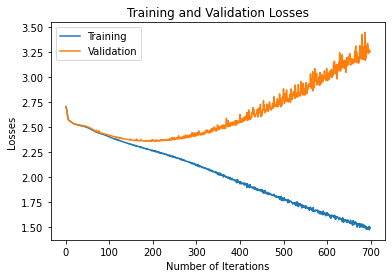

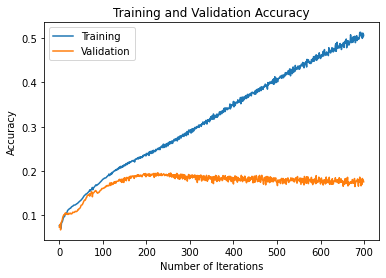

In [ ]:
# HINT: note that your training time should not take many days.

cnn_sgd_train_set, cnn_sgd_val_set, cnn_sgd_test_set = get_dataset('./data', mode='CNN')

# Pick your hyper parameters
max_epoch = 700
train_batch = 1024
val_batch = 256
test_batch = 256
learning_rate = 0.01

use_gpu = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Create train dataset loader
cnn_sgd_train_dl = DataLoader(cnn_sgd_train_set, batch_size=train_batch)
# Create validation dataset loader
cnn_sgd_val_dl = DataLoader(cnn_sgd_val_set, batch_size=train_batch)
# Create test dataset loader
cnn_sgd_test_dl = DataLoader(cnn_sgd_test_set, batch_size=train_batch)

# initialize your network
model = ConvNet()
model.to(use_gpu)

# define your loss function
loss = nn.CrossEntropyLoss().to(use_gpu)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0, weight_decay=5e-04) # you can play with  weight_decay as well

# structures to store losses, accuracies, and best path
train_acc = []
train_losses = []
val_acc = []
val_losses = []
best_loss = 1000
best_mlp_path = 'best_cnn_sgd.pth'

# start training
# for each epoch calculate validation performance
start = time.time()
for epoch in range(max_epoch):
  model = model.train()
  loc_losses = []
  loc_acc = []
  # iterate over training batches
  for idx, (data, labels) in enumerate(cnn_sgd_train_dl):
    # transfer data and labels to gpu
    data = data.to(use_gpu)
    labels = labels.to(use_gpu)

    # move forward in the network
    optimizer.zero_grad()
    pred_labels = model.forward(data.float()).squeeze()
    cur_loss = loss(pred_labels.to(use_gpu), labels.type(torch.LongTensor).to(use_gpu))
    acc = float((torch.max(pred_labels,1)[1]==labels).sum())/labels.shape[0]

    # backpropogate
    cur_loss.backward()
    optimizer.step()

    loc_acc.append(acc)
    loc_losses.append(cur_loss.item())

    print(f'Epoch: {epoch+1}/{max_epoch}    Batch: {idx+1}/{len(cnn_sgd_train_dl)}    Time: {time.time()-start:.3f} Loss: {cur_loss.item():.4f}   Accuracy: {acc:.4f}')

  train_acc.append(sum(loc_acc)/len(loc_acc))
  train_losses.append(sum(loc_losses)/len(loc_losses))
  


  # validation
  start = time.time()
  model = model.eval()
  with torch.no_grad():
    loc_losses = []
    loc_acc = []
    # iterate over validation batches
    for idx, (data, labels) in enumerate(cnn_sgd_val_dl):
      # transfer data and labels to gpu
        data = data.to(use_gpu)
        labels = labels.to(use_gpu)

        out = model.forward(data.float()).squeeze()
        cur_loss = loss(out.to(use_gpu), labels.type(torch.LongTensor).to(use_gpu))
        acc = float((torch.max(out,1)[1]==labels).sum())/labels.shape[0]

        loc_acc.append(acc)
        loc_losses.append(cur_loss.item())
      
    val_acc.append(sum(loc_acc)/len(loc_acc))
    val_losses.append(sum(loc_losses)/len(loc_losses))

    if val_losses[-1] < best_loss:
      # save best model according to validation performance
      torch.save(model, best_mlp_path)
      best_loss = val_losses[-1]

      
    print(f'>>> Validation -- Time: {time.time()-start:.3f}   Avg. Loss: {sum(val_losses)/len(val_losses):.4f}    Avg. Accuracy: {sum(val_acc)/len(val_acc):.4f}')
      

# plot losses vs epoch 
plt.plot(range(len(train_losses)), train_losses, label='Training')
plt.plot(range(len(val_losses)), val_losses, label='Validation')
plt.xlabel('Number of Iterations')
plt.ylabel('Losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# plot accuracies vs epoch
plt.plot(range(len(train_acc)), train_acc, label='Training')
plt.plot(range(len(val_acc)), val_acc, label='Validation')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

####Test with SGD [15 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **models**. Which one is more preferable? Why?

Mean Loss: 2.399016539255778 
Mean Acc: 0.17034143518518519 
Mean Macro Precision: 0.15816841455014494 
Mean Macro Recall: 0.17135693149754327 
Mean Macro F1 Score: 0.14666873740445627


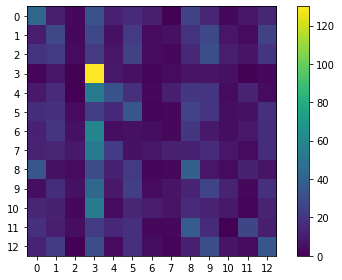

In [ ]:
# Test MLP
# load best model
best_path = './best_mlp_sgd.pth'  # "/content/drive/My Drive/.../best_mlp_sgd.pth"
model = torch.load(best_path)

# metrics and data
test_losses = []
tot_labels = torch.tensor([]).to(use_gpu)
tot_preds = torch.tensor([]).to(use_gpu)
cm = []
acc = []
prec = []
rec = []
f1 = []

# evaluate on test set
model = model.eval()

with torch.no_grad():
  # iterate over test batches
  for idx, (data, labels) in enumerate(mlp_sgd_test_dl):
    data = data.to(use_gpu)
    labels = labels.to(use_gpu)
    
    out = model.forward(data.float()).squeeze()
    cur_loss = loss(out.to(use_gpu), labels.type(torch.LongTensor).to(use_gpu))
    test_losses.append(cur_loss.item())

    

    # get max prediction value for the class
    preds = torch.max(out,1)[1]

    # append preds and labels to all preds and labels
    tot_preds = torch.cat((tot_preds, preds),dim=0)
    tot_labels = torch.cat((tot_labels, labels),dim=0)

    preds = preds.cpu().detach().numpy().astype(int)
    labels = labels.cpu().detach().numpy().astype(int)

    #   calculate accuracy
    acc.append(accuracy_score(labels, preds))
    
    #   calculate precision
    prec.append(precision_score(labels, preds, average='macro'))

    #   calculate recall
    rec.append(recall_score(labels, preds, average='macro'))

    #   calculate F1 score
    f1.append(f1_score(labels, preds, average='macro'))
    
# print metrics
print("Mean Loss:", sum(test_losses)/len(test_losses), "\nMean Acc:", sum(acc)/len(acc),"\nMean Macro Precision:", sum(prec)/len(prec), "\nMean Macro Recall:", sum(rec)/len(rec), "\nMean Macro F1 Score:", sum(f1)/len(f1)) 

tot_preds = tot_preds.cpu().detach().numpy().astype(int)
tot_labels = tot_labels.cpu().detach().numpy().astype(int)

#   get confusion matrix
cm = confusion_matrix(tot_labels, tot_preds)

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm)
fig.colorbar(im)
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.show()

Mean Loss: 2.3773183822631836 
Mean Acc: 0.18037149562757201 
Mean Macro Precision: 0.17879707516596546 
Mean Macro Recall: 0.1916060590012425 
Mean Macro F1 Score: 0.1746471950298298


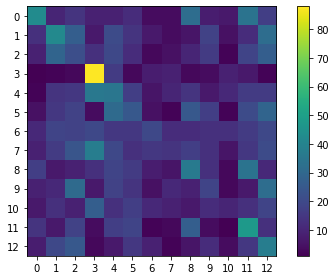

In [ ]:
# Test CNN
# load best model
best_path = './best_cnn_sgd.pth'  # "/content/drive/My Drive/.../best_mlp_sgd.pth"
model = torch.load(best_path)

# metrics and data
test_losses = []
tot_labels = torch.tensor([]).to(use_gpu)
tot_preds = torch.tensor([]).to(use_gpu)
cm = []
acc = []
prec = []
rec = []
f1 = []

# evaluate on test set
model = model.eval()

with torch.no_grad():
  # iterate over test batches
  for idx, (data, labels) in enumerate(cnn_sgd_test_dl):
    data = data.to(use_gpu)
    labels = labels.to(use_gpu)
    
    out = model.forward(data.float()).squeeze()
    cur_loss = loss(out.to(use_gpu), labels.type(torch.LongTensor).to(use_gpu))
    test_losses.append(cur_loss.item())

    # get max prediction value for the class
    preds = torch.max(out,1)[1]

    # append preds and labels to all preds and labels
    tot_preds = torch.cat((tot_preds, preds),dim=0)
    tot_labels = torch.cat((tot_labels, labels),dim=0)

    preds = preds.cpu().detach().numpy().astype(int)
    labels = labels.cpu().detach().numpy().astype(int)

    #   get confusion matrix
    cm = confusion_matrix(labels, preds)

    #   calculate accuracy
    acc.append(accuracy_score(labels, preds))
    
    #   calculate precision
    prec.append(precision_score(labels, preds, average='macro'))

    #   calculate recall
    rec.append(recall_score(labels, preds, average='macro'))

    #   calculate F1 score
    f1.append(f1_score(labels, preds, average='macro'))
    
# print metrics
print("Mean Loss:", sum(test_losses)/len(test_losses), "\nMean Acc:", sum(acc)/len(acc),"\nMean Macro Precision:", sum(prec)/len(prec), "\nMean Macro Recall:", sum(rec)/len(rec), "\nMean Macro F1 Score:", sum(f1)/len(f1)) 

tot_preds = tot_preds.cpu().detach().numpy().astype(int)
tot_labels = tot_labels.cpu().detach().numpy().astype(int)

#   get confusion matrix
cm = confusion_matrix(tot_labels, tot_preds)

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm)
fig.colorbar(im)
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.show()

The MLP training and validation results show that as the epochs are increased, the training loss decreases faster than the validation loss. The training accuracy however, increases faster than the validation accuracy. The training losses are lower and training accuracies higher than that of validation because the model overfits the data. The trend stays the same with the CNN model but discrepancy between losses and accuracies is even higher which suggests that it overfits the data more and has a more complex model. The CNN model also has more parameters and layers which means a higher model complexity. The test results show that CNN performs better than MLP with mean accuracies of 0.170 and 0.180 respectively which means than the CNN model gets more predictions correct. The precision and recall values for CNN are also higher than for MLP, and therefore a higher F1 score which indicates that CNN more predictions classified for a class were actually from that class and more true positives were found by it. Therefore, the CNN model is more preferable for this problem.

###Adam Optimizer [35 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [20 pts.]

Train both models up to 700 epochs with properly processed inputs, i.e. call your "get_dataset" function in mode "1" for MLP and mode "2" for CNN. This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best models, i.e. MLP and CNN models with highest performance, as "best_mlp_adam.pth" and "best_cnn_adam.pth". The best model decision is up to you. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures for each model:
1. training loss and validation loss vs. epoch
2. validation acuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

Streaming output truncated to the last 5000 lines.
Epoch: 423/700    Batch: 5/17    Time: 0.301 Loss: 0.4449   Accuracy: 0.8604
Epoch: 423/700    Batch: 6/17    Time: 0.336 Loss: 0.4449   Accuracy: 0.8789
Epoch: 423/700    Batch: 7/17    Time: 0.370 Loss: 0.6337   Accuracy: 0.8027
Epoch: 423/700    Batch: 8/17    Time: 0.405 Loss: 0.4422   Accuracy: 0.8799
Epoch: 423/700    Batch: 9/17    Time: 0.440 Loss: 0.4660   Accuracy: 0.8486
Epoch: 423/700    Batch: 10/17    Time: 0.475 Loss: 0.5515   Accuracy: 0.8320
Epoch: 423/700    Batch: 11/17    Time: 0.511 Loss: 0.4755   Accuracy: 0.8730
Epoch: 423/700    Batch: 12/17    Time: 0.547 Loss: 0.5614   Accuracy: 0.7998
Epoch: 423/700    Batch: 13/17    Time: 0.583 Loss: 0.6498   Accuracy: 0.7588
Epoch: 423/700    Batch: 14/17    Time: 0.618 Loss: 0.4017   Accuracy: 0.8994
Epoch: 423/700    Batch: 15/17    Time: 0.658 Loss: 0.5496   Accuracy: 0.8203
Epoch: 423/700    Batch: 16/17    Time: 0.693 Loss: 0.7042   Accuracy: 0.7832
Epoch: 423/700    

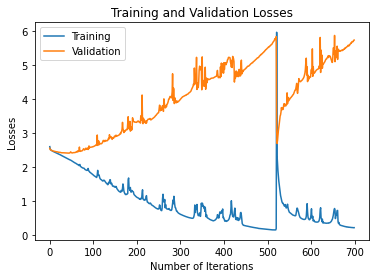

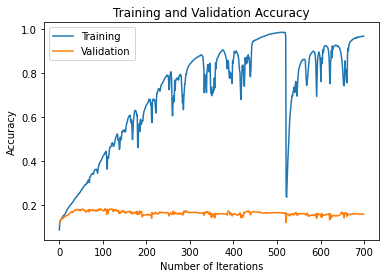

In [ ]:
# HINT: note that your training time should not take many days.
mlp_adam_train_set, mlp_adam_val_set, mlp_adam_test_set = get_dataset('./data', mode='MLP')

# Pick your hyper parameters
max_epoch = 700 
train_batch = 1024
val_batch = 256
test_batch = 256
learning_rate = 0.0001

use_gpu = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Create train dataset loader
mlp_adam_train_dl = DataLoader(mlp_adam_train_set, batch_size=train_batch)
# Create validation dataset loader
mlp_adam_val_dl = DataLoader(mlp_adam_val_set, batch_size=train_batch)
# Create test dataset loader
mlp_adam_test_dl = DataLoader(mlp_adam_test_set, batch_size=train_batch)

# initialize your network
model = FNet() 
model.to(use_gpu)

# define your loss function
loss = nn.CrossEntropyLoss().to(use_gpu)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well

# structures to store losses, accuracies, and best path
train_acc = []
train_losses = []
val_acc = []
val_losses = []
best_loss = 1000
best_mlp_path = 'best_mlp_adam.pth'

# start training
# for each epoch calculate validation performance
start = time.time()
for epoch in range(max_epoch):
  model = model.train()
  loc_losses = []
  loc_acc = []
  # iterate over training batches
  for idx, (data, labels) in enumerate(mlp_adam_train_dl):
    # transfer data and labels to gpu
    data = data.to(use_gpu)
    labels = labels.to(use_gpu)

    # move forward in the network
    optimizer.zero_grad()
    pred_labels = model.forward(data.float()).squeeze()
    cur_loss = loss(pred_labels.to(use_gpu), labels.type(torch.LongTensor).to(use_gpu))
    acc = float((torch.max(pred_labels,1)[1]==labels).sum())/labels.shape[0]

    # backpropogate
    cur_loss.backward()
    optimizer.step()

    loc_acc.append(acc)
    loc_losses.append(cur_loss.item())

    print(f'Epoch: {epoch+1}/{max_epoch}    Batch: {idx+1}/{len(mlp_adam_train_dl)}    Time: {time.time()-start:.3f} Loss: {cur_loss.item():.4f}   Accuracy: {acc:.4f}')

  train_acc.append(sum(loc_acc)/len(loc_acc))
  train_losses.append(sum(loc_losses)/len(loc_losses))
  


  # validation
  start = time.time()
  model = model.eval()
  with torch.no_grad():
    loc_losses = []
    loc_acc = []
    # iterate over validation batches
    for idx, (data, labels) in enumerate(mlp_adam_val_dl):
      # transfer data and labels to gpu
        data = data.to(use_gpu)
        labels = labels.to(use_gpu)

        out = model.forward(data.float()).squeeze()
        cur_loss = loss(out.to(use_gpu), labels.type(torch.LongTensor).to(use_gpu))
        acc = float((torch.max(out,1)[1]==labels).sum())/labels.shape[0]

        loc_acc.append(acc)
        loc_losses.append(cur_loss.item())
      
    val_acc.append(sum(loc_acc)/len(loc_acc))
    val_losses.append(sum(loc_losses)/len(loc_losses))

    if val_losses[-1] < best_loss:
      # save best model according to validation performance
      torch.save(model, best_mlp_path)
      best_loss = val_losses[-1]

      
    print(f'>>> Validation -- Time: {time.time()-start:.3f}   Avg. Loss: {sum(val_losses)/len(val_losses):.4f}    Avg. Accuracy: {sum(val_acc)/len(val_acc):.4f}')
      

# plot losses vs epoch 
plt.plot(range(len(train_losses)), train_losses, label='Training')
plt.plot(range(len(val_losses)), val_losses, label='Validation')
plt.xlabel('Number of Iterations')
plt.ylabel('Losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# plot accuracies vs epoch
plt.plot(range(len(train_acc)), train_acc, label='Training')
plt.plot(range(len(val_acc)), val_acc, label='Validation')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Streaming output truncated to the last 5000 lines.
Epoch: 423/700    Batch: 5/17    Time: 1.172 Loss: 1.9961   Accuracy: 0.3184
Epoch: 423/700    Batch: 6/17    Time: 1.330 Loss: 1.9438   Accuracy: 0.3457
Epoch: 423/700    Batch: 7/17    Time: 1.496 Loss: 1.9721   Accuracy: 0.3340
Epoch: 423/700    Batch: 8/17    Time: 1.655 Loss: 1.9053   Accuracy: 0.3691
Epoch: 423/700    Batch: 9/17    Time: 1.821 Loss: 1.9883   Accuracy: 0.3281
Epoch: 423/700    Batch: 10/17    Time: 1.978 Loss: 1.9856   Accuracy: 0.3252
Epoch: 423/700    Batch: 11/17    Time: 2.143 Loss: 1.9926   Accuracy: 0.3301
Epoch: 423/700    Batch: 12/17    Time: 2.304 Loss: 1.9995   Accuracy: 0.3145
Epoch: 423/700    Batch: 13/17    Time: 2.470 Loss: 1.9997   Accuracy: 0.3271
Epoch: 423/700    Batch: 14/17    Time: 2.631 Loss: 1.9795   Accuracy: 0.3447
Epoch: 423/700    Batch: 15/17    Time: 2.796 Loss: 1.9830   Accuracy: 0.3193
Epoch: 423/700    Batch: 16/17    Time: 2.952 Loss: 1.9560   Accuracy: 0.3496
Epoch: 423/700    

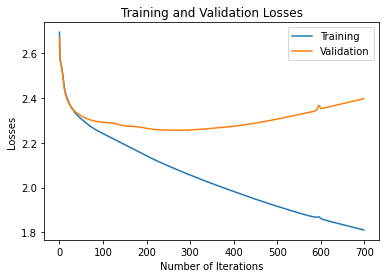

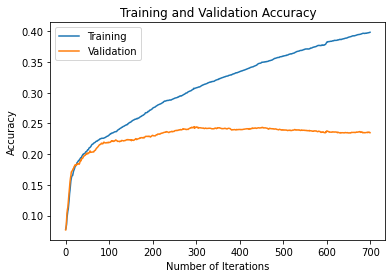

In [ ]:
cnn_adam_train_set, cnn_adam_val_set, cnn_adam_test_set = get_dataset('./data', mode='CNN')

# Pick your hyper parameters
max_epoch = 700 
train_batch = 1024
val_batch = 256
test_batch = 256
learning_rate = 0.0001

use_gpu = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Create train dataset loader
cnn_adam_train_dl = DataLoader(cnn_adam_train_set, batch_size=train_batch)
# Create validation dataset loader
cnn_adam_val_dl = DataLoader(cnn_adam_val_set, batch_size=train_batch)
# Create test dataset loader
cnn_adam_test_dl = DataLoader(cnn_adam_test_set, batch_size=train_batch)

# initialize your network
model = ConvNet()    
model.to(use_gpu)

# define your loss function
loss = nn.CrossEntropyLoss().to(use_gpu)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well

# structures to store losses, accuracies, and best path
train_acc = []
train_losses = []
val_acc = []
val_losses = []
best_loss = 1000
best_mlp_path = 'best_cnn_adam.pth'

# start training
# for each epoch calculate validation performance
start = time.time()
for epoch in range(max_epoch):
  model = model.train()
  loc_losses = []
  loc_acc = []
  # iterate over training batches
  for idx, (data, labels) in enumerate(cnn_adam_train_dl):
    # transfer data and labels to gpu
    data = data.to(use_gpu)
    labels = labels.to(use_gpu)

    # move forward in the network
    optimizer.zero_grad()
    pred_labels = model.forward(data.float()).squeeze()
    cur_loss = loss(pred_labels.to(use_gpu), labels.type(torch.LongTensor).to(use_gpu))
    acc = float((torch.max(pred_labels,1)[1]==labels).sum())/labels.shape[0]

    # backpropogate
    cur_loss.backward()
    optimizer.step()

    loc_acc.append(acc)
    loc_losses.append(cur_loss.item())

    print(f'Epoch: {epoch+1}/{max_epoch}    Batch: {idx+1}/{len(cnn_adam_train_dl)}    Time: {time.time()-start:.3f} Loss: {cur_loss.item():.4f}   Accuracy: {acc:.4f}')

  train_acc.append(sum(loc_acc)/len(loc_acc))
  train_losses.append(sum(loc_losses)/len(loc_losses))
  


  # validation
  start = time.time()
  model = model.eval()
  with torch.no_grad():
    loc_losses = []
    loc_acc = []
    # iterate over validation batches
    for idx, (data, labels) in enumerate(cnn_adam_val_dl):
      # transfer data and labels to gpu
        data = data.to(use_gpu)
        labels = labels.to(use_gpu)

        out = model.forward(data.float()).squeeze()
        cur_loss = loss(out.to(use_gpu), labels.type(torch.LongTensor).to(use_gpu))
        acc = float((torch.max(out,1)[1]==labels).sum())/labels.shape[0]

        loc_acc.append(acc)
        loc_losses.append(cur_loss.item())
      
    val_acc.append(sum(loc_acc)/len(loc_acc))
    val_losses.append(sum(loc_losses)/len(loc_losses))

    if val_losses[-1] < best_loss:
      # save best model according to validation performance
      torch.save(model, best_mlp_path)
      best_loss = val_losses[-1]

      
    print(f'>>> Validation -- Time: {time.time()-start:.3f}   Avg. Loss: {sum(val_losses)/len(val_losses):.4f}    Avg. Accuracy: {sum(val_acc)/len(val_acc):.4f}')
      

# plot losses vs epoch 
plt.plot(range(len(train_losses)), train_losses, label='Training')
plt.plot(range(len(val_losses)), val_losses, label='Validation')
plt.xlabel('Number of Iterations')
plt.ylabel('Losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# plot accuracies vs epoch
plt.plot(range(len(train_acc)), train_acc, label='Training')
plt.plot(range(len(val_acc)), val_acc, label='Validation')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

####Test with ADAM [15 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?

Mean Loss: 2.3791454633076987 
Mean Acc: 0.18035300925925926 
Mean Macro Precision: 0.1800867050973374 
Mean Macro Recall: 0.18501644489090993 
Mean Macro F1 Score: 0.16572576579949092


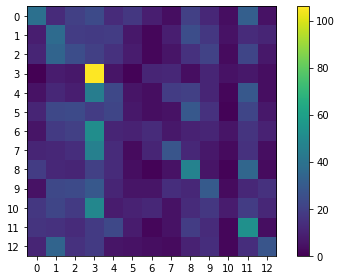

In [ ]:
# Test MLP
# load best model
best_path = './best_mlp_adam.pth'  # "/content/drive/My Drive/.../best_mlp_adam.pth"
model = torch.load(best_path)

# metrics and data
test_losses = []
tot_labels = torch.tensor([]).to(use_gpu)
tot_preds = torch.tensor([]).to(use_gpu)
cm = []
acc = []
prec = []
rec = []
f1 = []


# evaluate on test set
model = model.eval()

with torch.no_grad():
  # iterate over test batches
  for idx, (data, labels) in enumerate(mlp_adam_test_dl):
    data = data.to(use_gpu)
    labels = labels.to(use_gpu)
    
    out = model.forward(data.float()).squeeze()
    cur_loss = loss(out.to(use_gpu), labels.type(torch.LongTensor).to(use_gpu))
    test_losses.append(cur_loss.item())

    # get max prediction value for the class
    preds = torch.max(out,1)[1]

    # append preds and labels to all preds and labels
    tot_preds = torch.cat((tot_preds, preds),dim=0)
    tot_labels = torch.cat((tot_labels, labels),dim=0)

    preds = preds.cpu().detach().numpy().astype(int)
    labels = labels.cpu().detach().numpy().astype(int)

    #   get confusion matrix
    cm = confusion_matrix(labels, preds)

    #   calculate accuracy
    acc.append(accuracy_score(labels, preds))
    
    #   calculate precision
    prec.append(precision_score(labels, preds, average='macro'))

    #   calculate recall
    rec.append(recall_score(labels, preds, average='macro'))

    #   calculate F1 score
    f1.append(f1_score(labels, preds, average='macro'))
    
# print metrics
print("Mean Loss:", sum(test_losses)/len(test_losses), "\nMean Acc:", sum(acc)/len(acc),"\nMean Macro Precision:", sum(prec)/len(prec), "\nMean Macro Recall:", sum(rec)/len(rec), "\nMean Macro F1 Score:", sum(f1)/len(f1)) 

tot_preds = tot_preds.cpu().detach().numpy().astype(int)
tot_labels = tot_labels.cpu().detach().numpy().astype(int)

#   get confusion matrix
cm = confusion_matrix(tot_labels, tot_preds)

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm)
fig.colorbar(im)
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.show()

Mean Loss: 2.287309010823568 
Mean Acc: 0.21981497556584362 
Mean Macro Precision: 0.20989750234681148 
Mean Macro Recall: 0.22166899734402482 
Mean Macro F1 Score: 0.20804982498339095


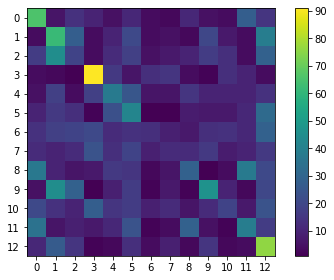

In [ ]:
# Test CNN
# load best model
# Test MLP
# load best model
best_path = './best_cnn_adam.pth'  # "/content/drive/My Drive/.../best_cnn_adam.pth"
model = torch.load(best_path)

# metrics and data
test_losses = []
tot_labels = torch.tensor([]).to(use_gpu)
tot_preds = torch.tensor([]).to(use_gpu)
cm = []
acc = []
prec = []
rec = []
f1 = []

# evaluate on test set
model = model.eval()

with torch.no_grad():
  # iterate over test batches
  for idx, (data, labels) in enumerate(cnn_adam_test_dl):
    data = data.to(use_gpu)
    labels = labels.to(use_gpu)
    
    out = model.forward(data.float()).squeeze()
    cur_loss = loss(out.to(use_gpu), labels.type(torch.LongTensor).to(use_gpu))
    test_losses.append(cur_loss.item())

    # get max prediction value for the class
    preds = torch.max(out,1)[1]

    # append preds and labels to all preds and labels
    tot_preds = torch.cat((tot_preds, preds),dim=0)
    tot_labels = torch.cat((tot_labels, labels),dim=0)

    preds = preds.cpu().detach().numpy().astype(int)
    labels = labels.cpu().detach().numpy().astype(int)

    #   get confusion matrix
    cm = confusion_matrix(labels, preds)

    #   calculate accuracy
    acc.append(accuracy_score(labels, preds))
    
    #   calculate precision
    prec.append(precision_score(labels, preds, average='macro'))

    #   calculate recall
    rec.append(recall_score(labels, preds, average='macro'))

    #   calculate F1 score
    f1.append(f1_score(labels, preds, average='macro'))
    
# print metrics
print("Mean Loss:", sum(test_losses)/len(test_losses), "\nMean Acc:", sum(acc)/len(acc),"\nMean Macro Precision:", sum(prec)/len(prec), "\nMean Macro Recall:", sum(rec)/len(rec), "\nMean Macro F1 Score:", sum(f1)/len(f1)) 

tot_preds = tot_preds.cpu().detach().numpy().astype(int)
tot_labels = tot_labels.cpu().detach().numpy().astype(int)

#   get confusion matrix
cm = confusion_matrix(tot_labels, tot_preds)

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm)
fig.colorbar(im)
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.show()

The accuracies and losses of the training set for both MLP and CNN with Adam are higher than that of the validation set. For CNN the trend is smooth and consistent but for MLP the validation loss suddenly decreases and the training loss suddenly increases at around 520 epochs but then resume their trends. Around the sample epochs the training accuracy also freefalls but then resumes its increasing trend. These trends suggest that both models overfit but the CNN model overfits more due to its increased complexity with more parameters and layers.  The test results indicate that for both MLP and CNN the Adam optimizer performs better than SGD with mean accuracy of 0.180 for MLP and 0.219 for CNN, and CNN still performed better. This means that with Adam the models got more predictions labelled correctly. Adam’s adaptive learning rate method for parameters also allowed its models to achieve higher recalls and precisions, and therefore higher F1 scores. This implies that more predictions classified for a class were actually from that class and more true positives were found by the model with Adam. Therefore, the Adam optimizer which adjusts learning rate by using gradient moments is more preferable for this problem. 